### Diversity of prophages in KASPAH

In [12]:
# jupyter setup
%reload_ext autoreload
%autoreload 2

# import modules
import warnings
import pandas as pd
from pathlib import Path
from Bio import Phylo
from scripts.utils import preprocessing, run_ANImm, get_phariants, run_mashtree
from scripts.utils import tree2clades, table2genbank, run_easyfig
warnings.filterwarnings('ignore')

In [3]:
# paths
work_dir = '/home/MCB/jkoszucki/phagedb/PHAGES-DB'
animm_dir = '/home/MCB/jkoszucki/Code/ANImm'
phrogs_annot_table = '/home/MCB/jkoszucki/phagedb/upgraded_phrog_annot_v3.tsv'
fonth_path = 

input_dir = '/home/MCB/jkoszucki/phagedb'
inphared_dir = Path(input_dir, 'INPHARED-DB-1Aug2022/INPHARED-DB-1Aug2022-KLEBSIELLA')
prophages_dir = Path(input_dir, 'PROPHAGES-DB-1Aug2022/prophages')

# params
wgrr_threshold = 0.85

# Run

In [4]:
### preprocessing of PROPHAGE-DB-1Aug2022 & INPHARED-DB-1Aug2022-KLEBSIELLA
# integrate data
phagedb_dir = Path(work_dir, '0_phagedb')
preprocessing(inphared_dir, prophages_dir, phrogs_annot_table, phagedb_dir) 

Records saved successfully :) 
ORFs copied successfully :)
Nothing to do in table2genbank :)
To force rerun delete /home/MCB/jkoszucki/phagedb/PHAGES-DB/0_phagedb/phages.gb
Metadata unified and copied successfully :) 
Functiona annotation input tables merged and saved :)


In [5]:
### calculate wGRR
animm_results_dir = Path(work_dir, '1_ANImm')
process = run_ANImm(animm_dir, phagedb_dir, animm_results_dir)

ANImm already done! To rerun delete folder: /home/MCB/jkoszucki/phagedb/PHAGES-DB/1_ANImm


In [6]:
### phariants from wGRR
# MCL community detection

wgrr = Path(animm_results_dir, 'wgrr.csv')
annot_input = Path(phagedb_dir, 'annot_input.txt')
phariants = Path(animm_results_dir, 'phariants.tsv')

phariants_df = get_phariants(wgrr, annot_input, phariants, wgrr_threshold)

Check! In some case I can loose singletons here!
Done! With wGRR treshold = 0.85 we have 696 phage clusters :)

In [7]:
### mashtree
# local machine needs a lots of memory because tree is firstly dropped loccaly then copied
tree_dir = Path(work_dir, '2_mashtree')
cmd = run_mashtree(phagedb_dir, tree_dir)

Just run the command in bash. Problem with conda env AGAIN : / 

source ~/.bashrc; conda activate mashtree; mashtree.pl /home/MCB/jkoszucki/phagedb/PHAGES-DB/0_phagedb/split_records/fasta/* >> /home/MCB/jkoszucki/phagedb/PHAGES-DB/2_mashtree/tree.newick; conda activate mybase;


Everything is good :) Cluster tree with kmeans method (n_cluster: 40).
Done! Phages grouped using mashtree! :)

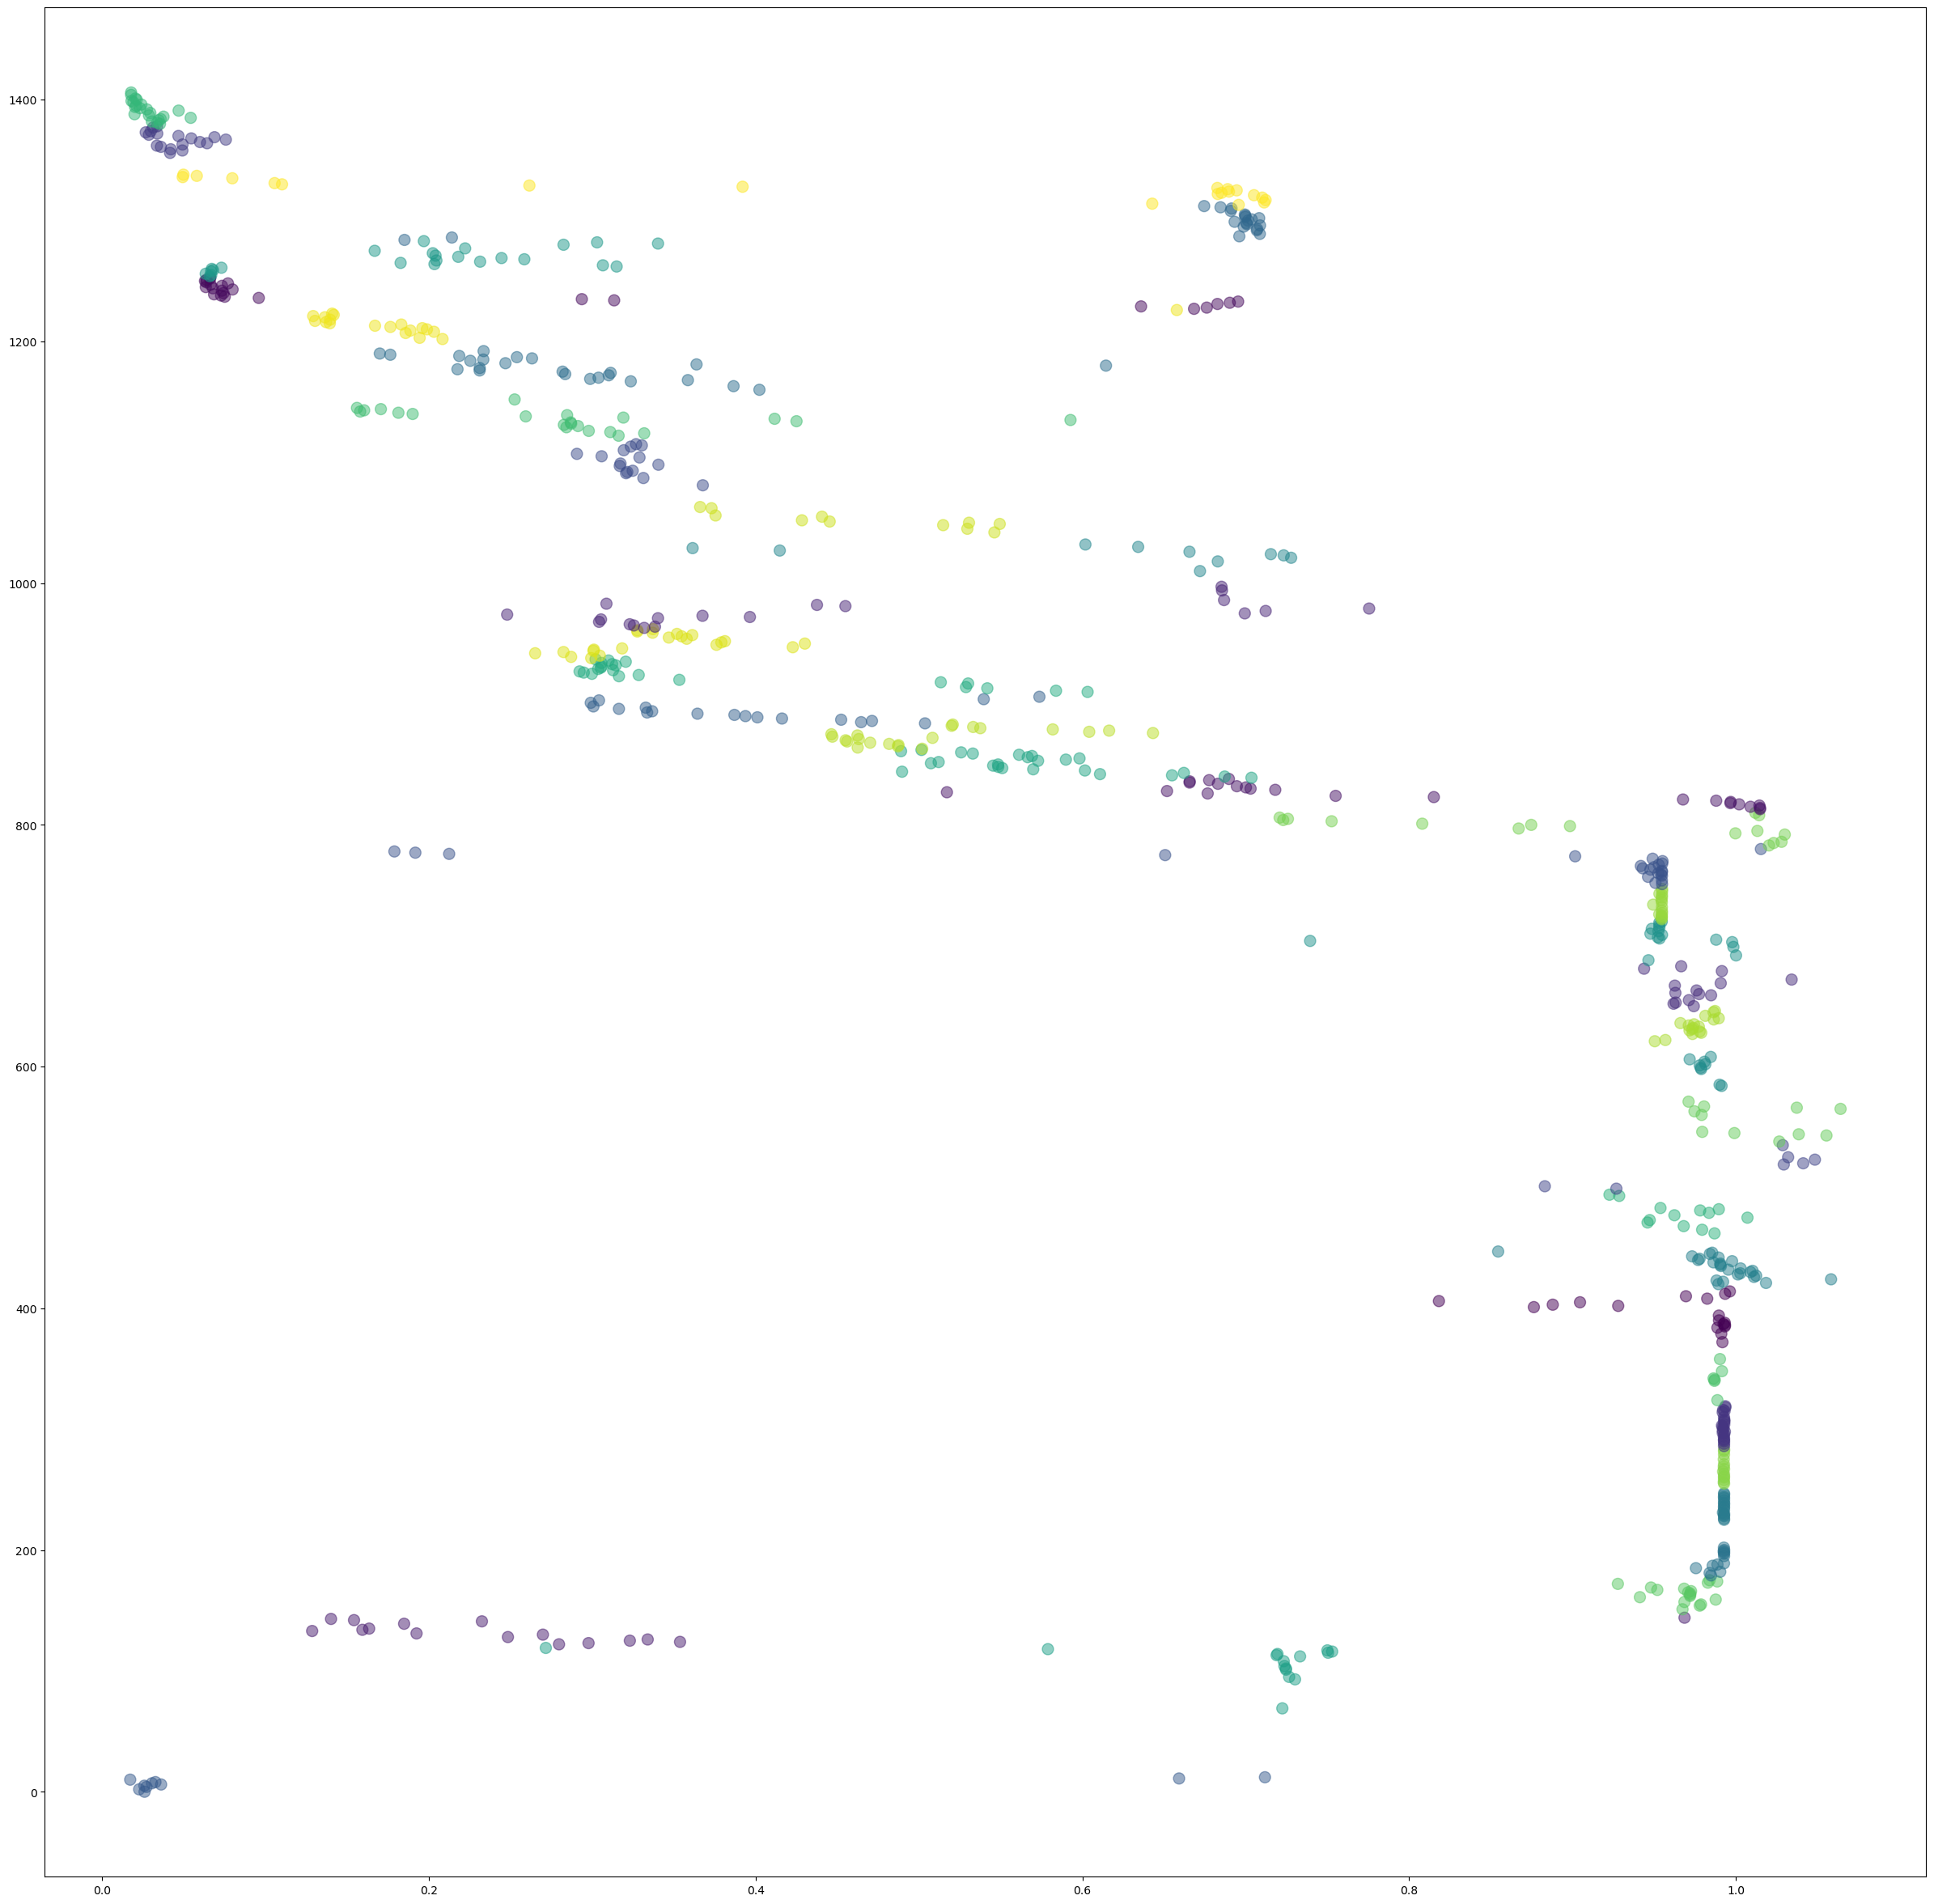

In [9]:
### get 'clades' based on mashtree 

tree_dir = Path(work_dir, '2_mashtree')
tree_path = Path(tree_dir, 'tree.newick')
phariants = Path(animm_results_dir, 'phariants.tsv')
clades = Path(tree_dir, 'clades.tsv')

n_clusters = 40

phage_clusters_df = tree2clades(tree_path, phariants, clades, n_clusters, kmeans_show=True)

In [15]:
### get easyfig figures
# annotated : ) 

clades = Path(tree_dir, 'clades.tsv')
prophages = Path(phagedb_dir, 'phages.tsv')
phages_genbank_dir = Path(phagedb_dir, 'split_records/genbank')

easyfig = Path('other/Easyfig.py').resolve()

annotate_columns = ['K_locus', 'ST', 'phageID', 'genetic_localisation']
leg_name = 'structural'

results_dir, process = run_easyfig(work_dir, clades, prophages, phages_genbank_dir, easyfig, leg_name=leg_name)

/home/MCB/jkoszucki/Code/phage-diversity/other/arial.ttf
Generating easyfig figures for {len(clusters)} clusters :) 
Subset!!!
source ~/.bashrc; conda activate easyfig ;                 python2 /home/MCB/jkoszucki/Code/phage-diversity/other/Easyfig.py                 -svg -legend double -leg_name structural -f CDS -f1 T -i 60 -filter -aln right                 -o /home/MCB/jkoszucki/phagedb/PHAGES-DB/easyfig/raw/clade_1.svg /home/MCB/jkoszucki/phagedb/PHAGES-DB/0_phagedb/split_records/genbank/MT701588.gb /home/MCB/jkoszucki/phagedb/PHAGES-DB/0_phagedb/split_records/genbank/MN395284.gb /home/MCB/jkoszucki/phagedb/PHAGES-DB/0_phagedb/split_records/genbank/ON148527.gb /home/MCB/jkoszucki/phagedb/PHAGES-DB/0_phagedb/split_records/genbank/OK625527.gb /home/MCB/jkoszucki/phagedb/PHAGES-DB/0_phagedb/split_records/genbank/MW394389.gb /home/MCB/jkoszucki/phagedb/PHAGES-DB/0_phagedb/split_records/genbank/MZ398244.gb /home/MCB/jkoszucki/phagedb/PHAGES-DB/0_phagedb/split_records/genbank/MK380014.g

NameError: name 'complete_process' is not defined

In [ ]:
process.stderr